In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import cluster, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
refugee_df = pd.read_csv('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/final_df_copy.csv')

# Clearly defined problem statement/goal.

The definition of a refugee, according to the 1967 Protocol Relating to the Status of Refugees, is an individual who due to fear of being persecuted for reasons of race, religion, nationality, membership of a political group, is outside his/her national country, and is unable to find protection in his/her national country. People who move in groups to avoid war or civil conflict are often considered as refugees. A refugee isn't an individual who stateless or denied entrance into a country. Instead the term "internally displaced people" (IDP) is used to define those individuals who may have moved for the same reasons as refugees but have not crossed the border. Recently Europe had a migration crisis, in which more than a million refugees crossed into Europe, causing a division in the European Union regarding the best way to deal with resettling people. This problem has caused the EU to relocate most of their refugees in Italy and Greece. Between the years 2010 and 2015 there has been a major spike in the number of refugees trying to find asylum. Due to this spike this has led to the European refugee crisis, in which there have been accidents with transportation and overpopulation. According to the UNHCR, the top three nationalities of the refugees, between January 2015 and March 2016 were Syria, Afghan, and Iraq. In 2015 the demographic of refugees and migrants, were 58% men, 17% women, and 25% children. The number of deaths hit an all time high in April 2015, when five boats carrying 2000 migrants to Europe sank in the Mediterranean Sea, in which the death toll was estimated at 1,200 people.

The Syrian Conflict has been an ongoing issue in which 250,000 citizens have lost their lives over a war that started with an armed conflict. Similarly there have been multiple civil wars and protests that have led citizens to find asylum in different countries. After reading into these conflicts, I decided to look into the recent trends in the acceptance of refugees. Previously there have been issues with refugees being treated poorly, and lack of a safe community. By looking into a country's profile, including the population, murder rate by 1000, poverty, etc I hope to be able to see the correlation between these variables and the refugees in 2015. Similarly I hope to see if the country's profile can predict if the country previously had a civil war or a famine strike in the past 15 years. 

# Description of data, including the source.

Refugees 2010&2015: http://popstats.unhcr.org/en/persons_of_concern

Continent: https://en.wikipedia.org/wiki/List_of_countries_by_system_of_government

Murder Rate: http://www.nationmaster.com/country-info/stats/Crime/Murder-rate

Children: http://www.nationmaster.com/country-info/stats/Education/Children-out-of-school%2C-primary-per-1000

Government: https://en.wikipedia.org/wiki/List_of_countries_by_system_of_government

GDP: http://databank.worldbank.org/data/download/GDP.pdf

Immigrants: https://en.wikipedia.org/wiki/List_of_countries_by_immigrant_population

Rain: http://www.nationmaster.com/country-info/stats/Geography/Average-precipitation-in-depth/Mm-per-year

Density/Population/Area: https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_population_density

Famine: http://www.cs.mcgill.ca/~rwest/link-suggestion/wpcd_2008-09_augmented/wp/l/List_of_famines.htm

Civil War: https://en.wikipedia.org/wiki/List_of_civil_wars

Poverty: http://www.indexmundi.com/g/r.aspx?v=69

In [3]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

The dataset imported contains the number of refugees for the years 2010 and 2015. I decided to look in these years as there have been multiple protests, and the recent European crisis which occurred in 2015. 
The Key value is used in the folium visualization to map the country in the refugee dataframe with the country json file. I included the Continent column to look into the regions that were most accepting of the refugees, after Europe. The government column was added to see if the way the country was run could have an impact on wars and refugee count, the values include Republic, Constitutional Monarchy, and Absolute Monarchy. The GDP column was added as a method to see how a country prospers with trade and services, this column is measured in millions of US dollars. The immigrants column includes the total number of immigrants who immigrate to the Country due to work, or personal reasons, this was added as a measure to see how lenient a country is in accepting refugees. The murder rate is a column that says the number of people out of 1000 who were murdered in 2015, this a measure to see how safe and accepting a country is. The Children out of school column sees how important the country values children's education, which could be a deciding factor for parents. The Rain fall in ml is used as an indicator of weather and how it might affect a refugee's decision in the country they find asylum in. The population is the total number of people who live in the country, the area is the area of the country in square miles, and the Density is the ratio between the population and area. Realistically if the country's density is high there is a chance refugees would try to avoid the country, compared to a smaller density. The famine column is a binary column that shows if there was a famine is the past 15 years, this will be helpful in deciding whether the country is inadequate in providing a safe community. Similarly, the Civil war column looks into civil wars in the past 15 years. The Female and Male population are used to see the demographics of the country and how it might affect the number of refugees. The poverty column measures the percentage of people under the poverty column, this variable would definitely be helpful in visualizing the correlation between the number of refugees in 2015. I believe these variables would be beneficial in showing the trends in the number of refugees, as it includes the demographics, economic, and political aspect of each country.

## Data Dictionary

In [4]:
refugee_df['Difference'] = refugee_df['Refugees_2015'] - refugee_df['Refugees_2010']

In [5]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty', u'Difference'],
      dtype='object')

In [6]:
data_dict = { 'Country' : [refugee_df['Country'].dtypes, 'Country of the World', len(refugee_df['Country'])],
               'Key' : [refugee_df['Key'].dtypes, 'Key used for Folium', len(refugee_df['Key'])],
               'Continent' : [refugee_df['Continent'].dtypes, 'Continent of the Country', len(refugee_df['Continent'])],
               'Refugees_2010' : [refugee_df['Refugees_2010'].dtypes, 'Refugees in 2010', len(refugee_df['Refugees_2010'])],
               'Refugees_2015' : [refugee_df['Refugees_2015'].dtypes, 'Refugees in 2015', len(refugee_df['Refugees_2015'])],
               'Murder Rate' : [refugee_df['Murder Rate'].dtypes, 'Murder Rate per 100,000', len(refugee_df['Murder Rate'])],
               'Children_out_of_school' : [refugee_df['Children_out_of_school'].dtypes, 'Number of children out of primary school/1000', len(refugee_df['Children_out_of_school'])],
               'Government' : [refugee_df['Government'].dtypes, 'Government of the Country', len(refugee_df['Government'])],
               'GDP($ in million)' : [refugee_df['GDP($ in million)'].dtypes, 'GDP in US$ millions', len(refugee_df['GDP($ in million)'])],
               'Immigrants' : [refugee_df['Immigrants'].dtypes, 'Number of Immigrant Population', len(refugee_df['Immigrants'])],
               'Rain(ml)' : [refugee_df['Rain(ml)'].dtypes, 'Rain in ml per year/1000', len(refugee_df['Rain(ml)'])],
               'Density(pop/mi)' : [refugee_df['Density(pop/mi)'].dtypes, 'Density based on population and miles', len(refugee_df['Density(pop/mi)'])],
               'Population' : [refugee_df['Population'].dtypes, 'Population for each country', len(refugee_df['Population'])],
               'Area(mi)' : [refugee_df['Area(mi)'].dtypes, 'Area in miles', len(refugee_df['Area(mi)'])],
               'Famine': [refugee_df['Famine'].dtypes, 'If there is a major famine in the past 15 years', len(refugee_df['Famine'])],
               'Female': [refugee_df['Female'].dtypes, 'Percentage of female population', len(refugee_df['Female'])],
               'Male' : [refugee_df['Male'].dtypes, 'Percentage of male population', len(refugee_df['Male'])],
               'Civil': [refugee_df['Civil'].dtypes, 'If there is a major civil war in the past 15 years', len(refugee_df['Civil'])],
               'Poverty' : [refugee_df['Poverty'].dtypes, 'Percentage of poverty', len(refugee_df['Poverty'])],
               'Difference':[refugee_df['Difference'].dtypes, 'Difference between 2010 and 2015', len(refugee_df['Difference'])]
            }

data_dict

{'Area(mi)': [dtype('float64'), 'Area in miles', 176],
 'Children_out_of_school': [dtype('float64'),
  'Number of children out of primary school/1000',
  176],
 'Civil': [dtype('float64'),
  'If there is a major civil war in the past 15 years',
  176],
 'Continent': [dtype('O'), 'Continent of the Country', 176],
 'Country': [dtype('O'), 'Country of the World', 176],
 'Density(pop/mi)': [dtype('float64'),
  'Density based on population and miles',
  176],
 'Difference': [dtype('float64'), 'Difference between 2010 and 2015', 176],
 'Famine': [dtype('float64'),
  'If there is a major famine in the past 15 years',
  176],
 'Female': [dtype('float64'), 'Percentage of female population', 176],
 'GDP($ in million)': [dtype('float64'), 'GDP in US$ millions', 176],
 'Government': [dtype('O'), 'Government of the Country', 176],
 'Immigrants': [dtype('float64'), 'Number of Immigrant Population', 176],
 'Key': [dtype('O'), 'Key used for Folium', 176],
 'Male': [dtype('float64'), 'Percentage of mal

In [7]:
data_df = pd.DataFrame(data_dict)

In [8]:
data_df = data_df.T
data_df.reset_index(inplace = True)
data_df.rename(columns={'index' : 'Variables', 0: 'data type', 1: 'Description', 2 : 'Length'}, inplace=True)
data_df

,Variables,data type,Description,Length
0,Area(mi),float64,Area in miles,176
1,Children_out_of_school,float64,Number of children out of primary school/1000,176
2,Civil,float64,If there is a major civil war in the past 15 y...,176
3,Continent,object,Continent of the Country,176
4,Country,object,Country of the World,176
5,Density(pop/mi),float64,Density based on population and miles,176
6,Difference,float64,Difference between 2010 and 2015,176
7,Famine,float64,If there is a major famine in the past 15 years,176
8,Female,float64,Percentage of female population,176
9,GDP($ in million),float64,GDP in US$ millions,176


# Description of relevant data cleaning and munging.

The data cleaning process was the most difficult and time consuming as it took time to scrape and combine the individual lists into multiple dataframes. This step involved scrapping data from UNHCR, World Bank, and Wikipedia charts. Each data frame had a different cleaning method, but most of the cleaning was modifying the type of the variables and removing the extra characters from float types. Couple issues I had dealt with the italicized and bold countries when scrapping data, and the different spelling of the country's amongst the data frames. In terms of the country's spelling I decided to work off the JSON file since it would be needed to map the visualization. After creating a function to find the difference between two dataframe columns I was able to find the specific countries that needed to change. The final cleaning process involved merging the data frames in which I used left join to include all countries, even if they contained NULL values. This dataframe was later used in the folium map visualization, since any missing countries would cause an error with the visualization. I later took a copy and deleted columns with all NULLs to be used for EDA and modeling. For the additional NULL values I took the mean of each column, except for the civil war and famine in which I inputted 0. The reason why I didn't drop the columns was to prevent any skewed data, create an accurate model, and prevent the loss of useful data, as some of the rows were only missing one or two columns. 

# EDA relevant to your problem statement.

In [9]:
#The EDA for this dataframe was done in the EDA report.
refugee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 20 columns):
Country                   176 non-null object
Key                       176 non-null object
Continent                 162 non-null object
Refugees_2010             176 non-null float64
Refugees_2015             176 non-null float64
Murder Rate               176 non-null float64
Children_out_of_school    176 non-null float64
Government                162 non-null object
GDP($ in million)         176 non-null float64
Immigrants                176 non-null float64
Rain(ml)                  176 non-null float64
Density(pop/mi)           176 non-null float64
Population                176 non-null float64
Area(mi)                  176 non-null float64
Famine                    176 non-null float64
Female                    176 non-null float64
Male                      176 non-null float64
Civil                     176 non-null float64
Poverty                   176 non-null float64
Differ

In [10]:
refugee_df.head()

,Country,Key,Continent,Refugees_2010,Refugees_2015,Murder Rate,Children_out_of_school,Government,GDP($ in million),Immigrants,Rain(ml),Density(pop/mi),Population,Area(mi),Famine,Female,Male,Civil,Poverty,Difference
0,Afghanistan,AFG,Asia,6434.0,257553.0,3.400000,122.810,Republic,19199.0,105090.0,327.0,77.0,23700715.0,308642.0,1.0,49.3,50.7,0.0,36.0,251119.0
1,Angola,AGO,Africa,15155.0,15537.0,9.157481,25.420,Republic,102643.0,87436.0,1010.0,36.0,258958.0,7172.0,0.0,50.4,49.6,0.0,40.5,382.0
2,Albania,ALB,Europe,76.0,79.0,4.500000,6.860,Constitutional monarchy,11456.0,57616.0,1485.0,218.0,15184116.0,69898.0,0.0,49.9,50.1,0.0,14.3,3.0
3,United Arab Emirates,ARE,Asia,538.0,658.0,0.920000,0.626,Republic,370293.0,7826981.0,78.0,218.0,20121641.0,92043.0,0.0,29.9,70.1,0.0,19.5,120.0
4,Argentina,ARG,South America,3276.0,3142.0,5.500000,0.938,Constitutional monarchy,548055.0,1885678.0,591.0,19.2,4616000.0,240324.0,0.0,51.1,48.9,0.0,30.0,-134.0


In [11]:
refugee_df.describe().T 
#Look into the information about each variable regarding the mean, std, percentile, and max

,count,mean,std,min,25%,50%,75%,max
Refugees_2010,176.0,6.820563e+04,1.940673e+05,0.0000,629.000,8.370500e+03,6.820563e+04,1.900621e+06
Refugees_2015,176.0,1.036349e+05,2.673256e+05,0.0000,700.000,9.154000e+03,1.036349e+05,2.541308e+06
Murder Rate,176.0,9.157481e+00,1.182496e+01,0.0000,1.880,6.950000e+00,9.157481e+00,7.100000e+01
Children_out_of_school,176.0,1.510569e+01,2.294157e+01,0.0322,1.370,6.025000e+00,1.510569e+01,1.290900e+02
GDP($ in million),176.0,4.607422e+05,1.650800e+06,0.0000,13947.000,6.433000e+04,4.557148e+05,1.794700e+07
Immigrants,176.0,1.440562e+06,3.993236e+06,2585.0000,105047.250,3.281140e+05,1.440562e+06,4.662710e+07
Rain(ml),176.0,1.110788e+03,7.242663e+02,51.0000,592.500,1.096500e+03,1.538500e+03,3.142000e+03
Density(pop/mi),176.0,5.577026e+02,2.284673e+03,0.0800,64.000,1.930000e+02,5.062500e+02,2.780350e+04
Population,176.0,3.375950e+07,1.128589e+08,56.0000,739098.250,7.708927e+06,3.375950e+07,1.379129e+09
Area(mi),176.0,2.781593e+05,7.372651e+05,0.1700,8443.250,7.805500e+04,2.781593e+05,6.601668e+06


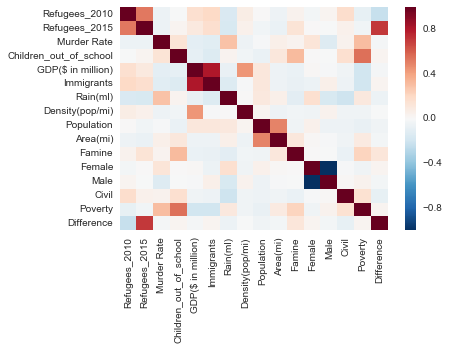

In [12]:
#Based on the heatmap we can see the relationship between the numeric data types. 
#The squares closer to dark red have a strong positive relationship, 
#while squares closer to dark blue have a strong negative relationship. 
sns.heatmap(refugee_df.corr())

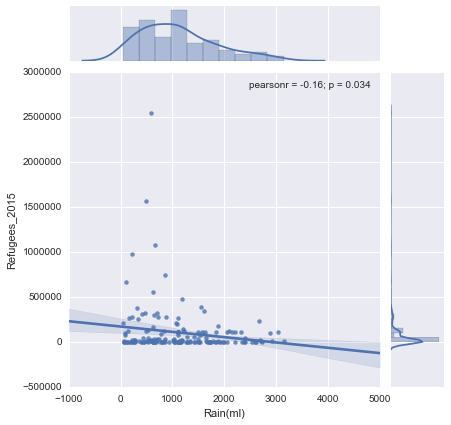

In [13]:
#The jointplot shows the relationship between Rain and the number of Refugees in 2015.
#The histogram is a helpful method to see the distribution of the values, mode, min,
#and max.
g = sns.jointplot("Rain(ml)", "Refugees_2015", data=refugee_df, kind="reg")

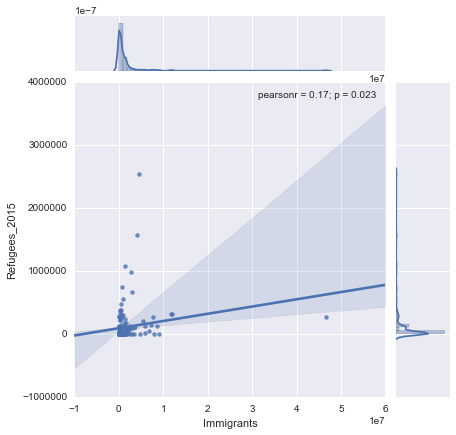

In [14]:
#This jointplot shows the relationship between the Immigrants and Refugees in 2015.
#Based on the pearson r value there is a slight positive correlation between these
#variables. The Histograms similarly show the values that most populated.
g = sns.jointplot("Immigrants", "Refugees_2015", data=refugee_df, kind="reg")

In [15]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty', u'Difference'],
      dtype='object')

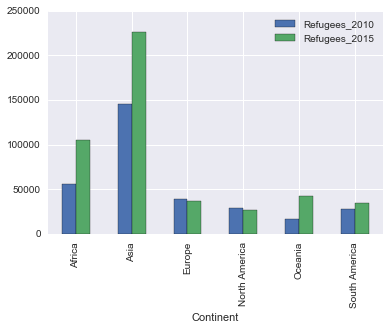

In [16]:
#The matplotlib shows the number of refugees in 2010, and 2015 grouped by the Continents.
#Asia took the most refugees in both 2010, and 2015. Oceania took the least number of refugees
#in 2010; however, North America took the least in 2015.

refugee_df.groupby('Continent')[['Refugees_2010', 'Refugees_2015']].mean().plot(kind = 'bar')

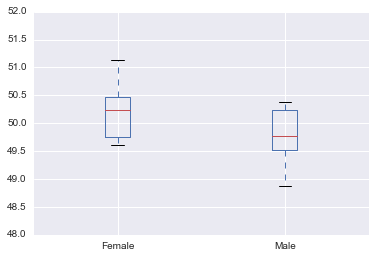

In [17]:
#The Box plot shows the relationship between the female and male population of each country.
refugee_df.groupby('Continent')[['Female', 'Male']].mean().plot(kind = 'box')

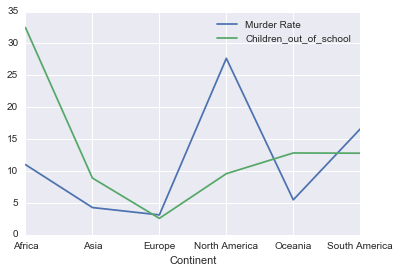

In [18]:
#Based on the line graph Africa has the most number of Children out of school, while North America has the most 
#murders. Overall Europe has the lowest value for both Murder Rate and Children out of school. 
refugee_df.groupby('Continent')[['Murder Rate', 'Children_out_of_school']].mean().plot(kind = 'line')

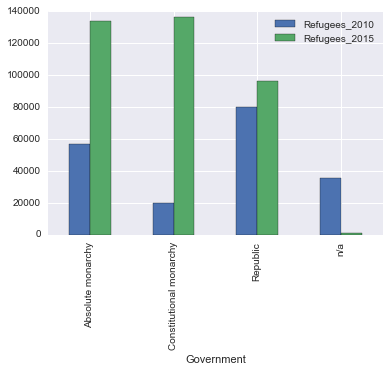

In [19]:
#This groupby shows the trends in number of refugees in 2010, and 2015 by government.
#Based on the plot we can see a sudden increase in acceptance frm Constitutional monarcy, 
#while there is a slight increase in Republic.

refugee_df.groupby('Government')[['Refugees_2010', 'Refugees_2015']].mean().plot(kind = 'bar')

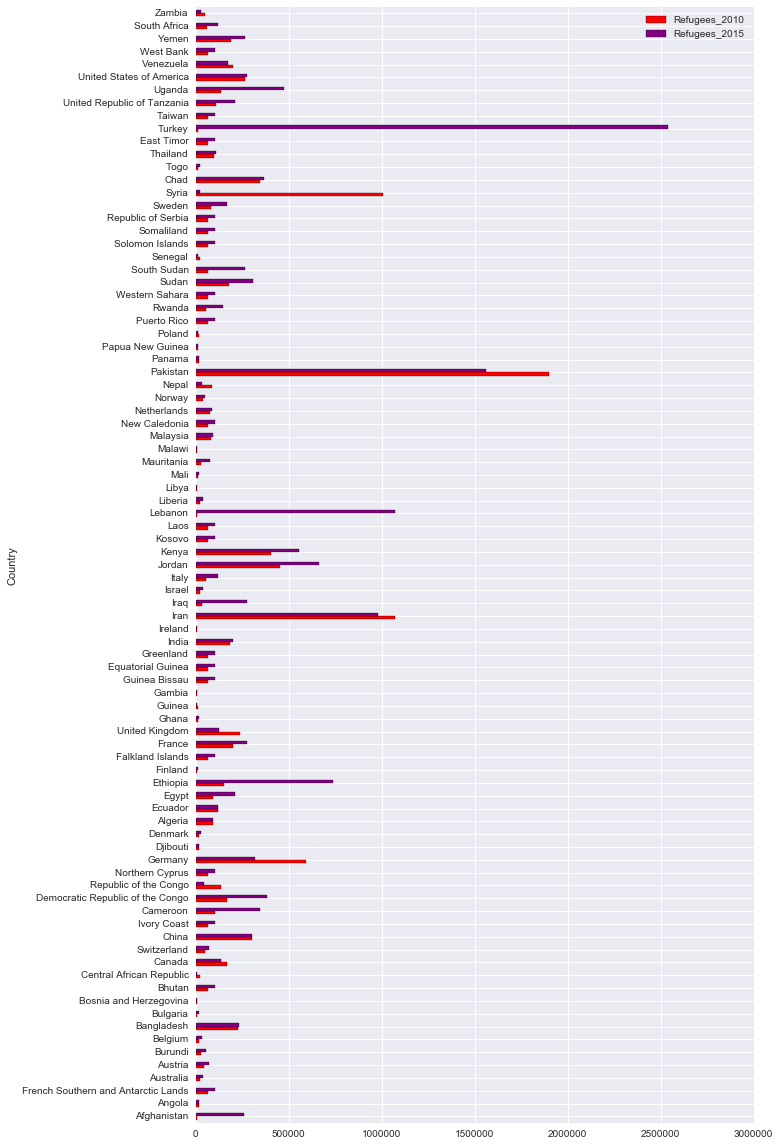

In [20]:
#This plot shows the countries who accepted more than 5000 refugees in 2010 and 2015. Based on the
#plot we can see a huge increase in Turkey's acceptance, and a decrease in Syria due to the Syria civil war.

ref_2010 = refugee_df[(refugee_df.Refugees_2010 > 5000) & (refugee_df.Refugees_2015 > 5000)]
ref_2010.plot(kind='barh',x='Country',y=['Refugees_2010', 'Refugees_2015'],figsize=(10,20),color = ['red', 'purple'])

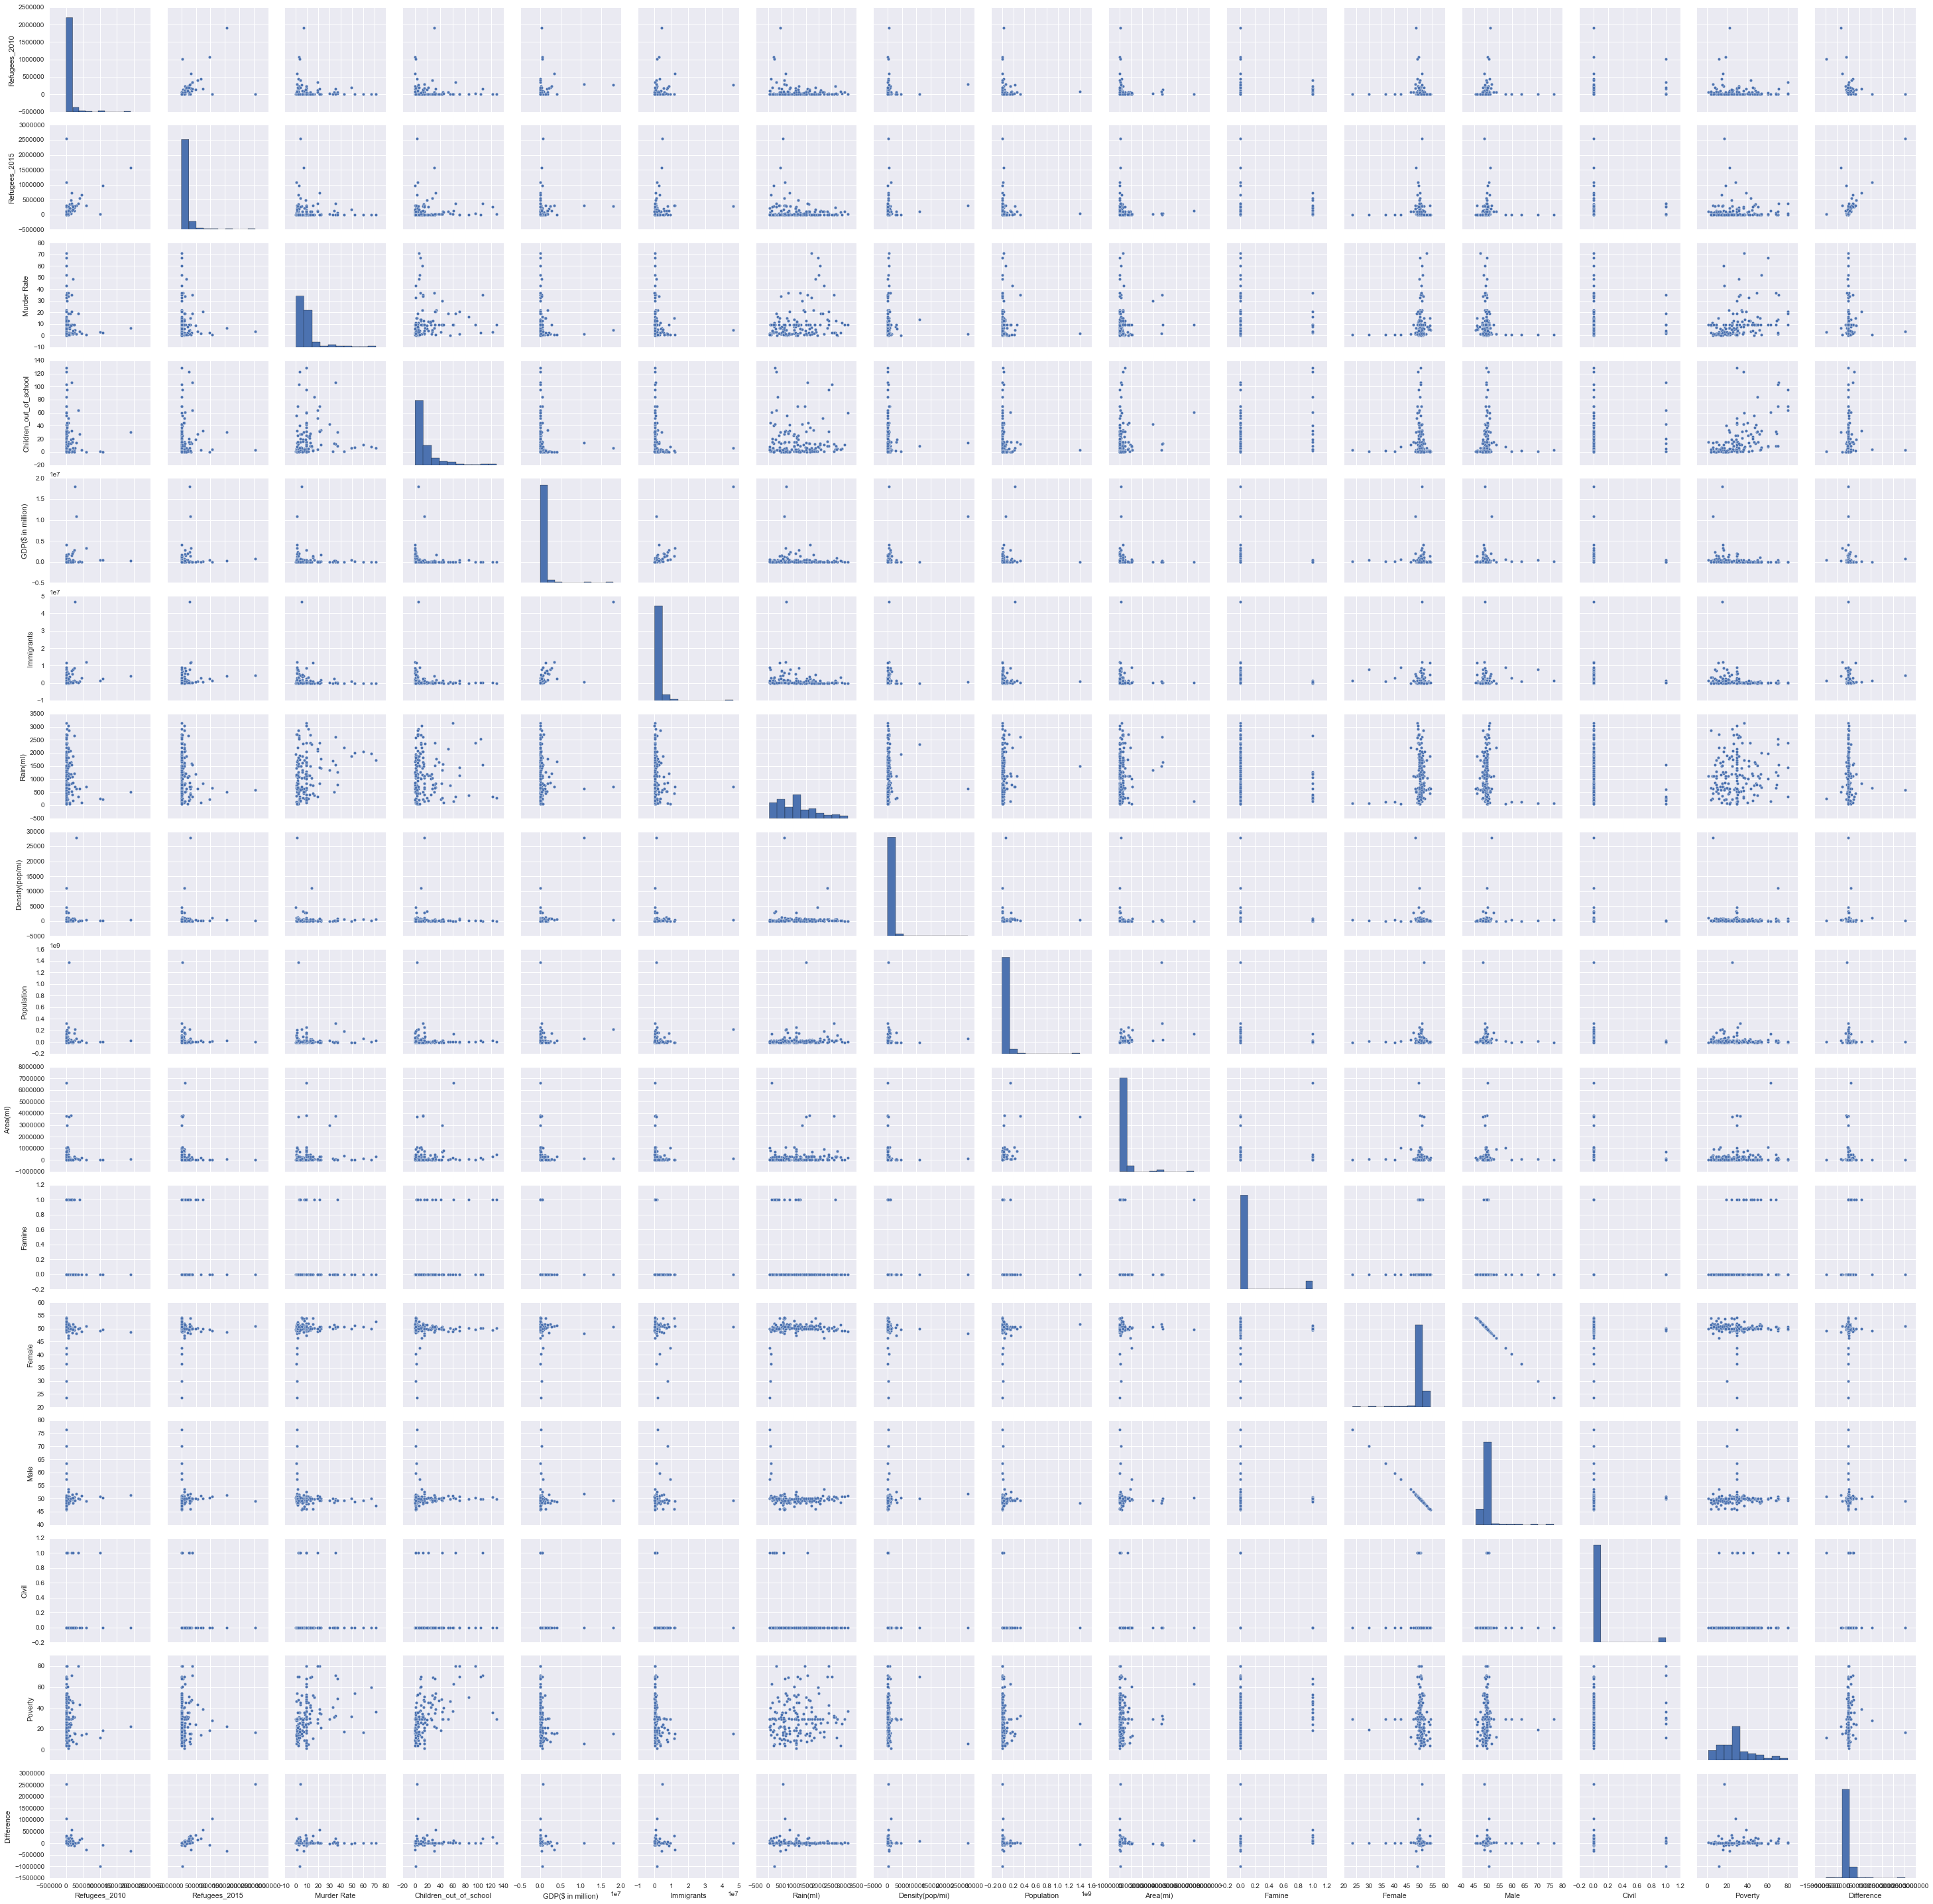

In [21]:
#The pairplot shows the relationship between every variable in the dataframe amongst itself.
sns.pairplot(refugee_df)

# Description of model selection.

My initial models include a simple Linear and Logistic model trying to find the parameters that created the best model. The Linear Regression model used the number of refugees in 2010, Rainfall in ml, Population of the country, recent famine, Female, and male population to predict the number of refugees in 2015. I additionally used various cross validation methods, including RidgeCV, ElasticNetCV, and LassoCV to get the best R2. However; the values were worse than the original Linear Model. The first Logistic Regression model predicts whether a country had a Civil War in the past 15 years based on the Number of Refugees in 2010, 2015, Murder Rate, children out of primary school, size of the country in miles, and whether the country had a recent famine. I experimented with GridSearchCV and was able to get the best score for the model. The second Logistic Regression model is similar to the first Logistic model except I predicted Famine, and used Civil War instead of Famine as the predictor variable. I included an additional model to see whether a country's government can be predicted based on various variables. This information would be helpful in predicting how the government deals with its politics and conflicts.

After creating the simple regression models I decided to expand on the models by creating linear models with PCA, and Decision Tree classification models. The PCA model is helpful in creating an axis around each variable which decreases variation and improves the model's score, which in my case was true. The Decision Tree classification model uses an algorithm model similar to a binary tree that traverses through each node trying to see the best variables that predict the target variable. Using the variables I used in the logistic model to predict the civil war, I was able to get a strong R2 score. The ROC curves are primarily used to show the relationship between the predicted and true variables, of the target variable (civil war and famine). The AUC is a measurement of how useful the model is compared to guessing the predictions. The PR curve is used as a visual metric mapping the precision and recall of the target variable. As a recap the precision is the probability the target variable is yes, while recall is the probability the target variable is yes when it actually is yes.

# Well-documented code of modeling you performed to answer your question.

## Linear Regression

In [22]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty', u'Difference'],
      dtype='object')

In [23]:
#The Linear Regression model predicts the number of refugees in 2015, given the number of refugees in 2010,
#Rain fall, Population, Famine, Female, and Male population

value = refugee_df.filter(regex = 'Ref|Rain|Pop|Fam|Fem|Male')
rem = refugee_df.filter(regex = '2015')
col = value.columns - rem.columns
X = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee_df['Refugees_2015'].values

lm = LinearRegression()
model = lm.fit(Xn, y)
scores = cross_val_score(lm, Xn, y, cv=5)
print "R2", np.mean(scores)

R2 0.418109496


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


## Logistic Regression

In [24]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty', u'Difference'],
      dtype='object')

In [25]:
value = refugee_df.filter(regex = 'Ref|Rate|Child|Are|Fam|Gov')
rem = refugee_df.filter(regex = 'Gov')
col = value.columns - rem.columns
X = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee_df['Government'].values

lr = LogisticRegression()
model = lr.fit(Xn, y)
score = cross_val_score(lr, Xn, y, cv = 5)
print "R2", np.mean(score)

R2 0.726136613003


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()
//anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
//anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


In [26]:
#The Logistic Regression looks into the Civil War variable, given the variables Refugees in 2010, 2015, 
#Children out of primary school, Area, and recent Famines.

value = refugee_df.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee_df.filter(regex = 'Civ')
col = value.columns - rem.columns
X = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee_df['Civil'].values

lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

#Grid Search searches for the best parameters into Logistic Regression.
lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
best_lr = lr_gs.best_estimator_

cv_indices = StratifiedKFold(y, n_folds=5)

lr_scores = []
knn_scores = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = Xn[train_inds, :], y[train_inds]
    Xte, yte = Xn[test_inds, :], y[test_inds]
    
    best_lr.fit(Xtr, ytr)
    lr_scores.append(best_lr.score(Xte, yte))

print '----------------------'
print 'Logistic Regression:',np.mean(lr_scores)
print 'Baseline accuracy:', np.mean(y)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.9s finished


----------------------
Logistic Regression: 0.954901960784
Baseline accuracy: 0.0454545454545


In [27]:
#The second logistic regression model looking into the number of refugees in 2010, 2015, Children out of school
#Area, and Civil Wars to predict Famine.

value = refugee_df.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee_df.filter(regex = 'Fam')
col = value.columns - rem.columns
X = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee_df['Famine'].values
lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

#Find the best parameter to fit the Logistic Regression.
lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
best_lr = lr_gs.best_estimator_

cv_indices = StratifiedKFold(y, n_folds=5)

lr_scores = []
knn_scores = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = Xn[train_inds, :], y[train_inds]
    Xte, yte = Xn[test_inds, :], y[test_inds]
    
    best_lr.fit(Xtr, ytr)
    lr_scores.append(best_lr.score(Xte, yte))

print '----------------------'
print 'Logistic Regression:',np.mean(lr_scores)
print 'Baseline accuracy:', np.mean(y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.7s


----------------------
Logistic Regression: 0.920616246499
Baseline accuracy: 0.0795454545455


[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished


## ROC Curve

In [28]:
#Using the values from the first Logistic Regression
value = refugee_df.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee_df.filter(regex = 'Civ')
col = value.columns - rem.columns
X = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee_df['Civil'].values

lm = LogisticRegression()
model = lm.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [29]:
#Function to plot the ROC curve.
from sklearn.metrics import roc_curve, roc_auc_score, auc

def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' vs. not ROC curve\n', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()

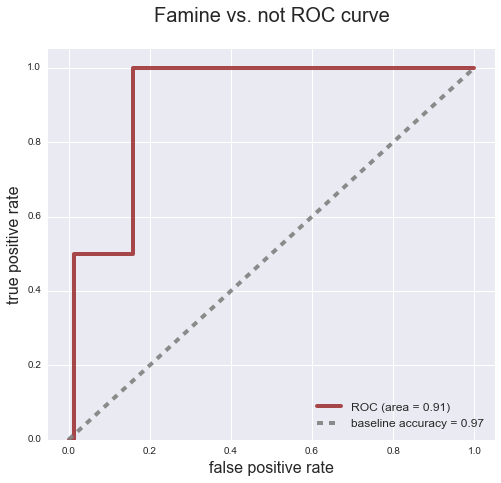

In [30]:
plot_roc(lm, X_test, y_test, 'Famine') #ROC curve for Famine

In [31]:
#Using the second logistic Regression model, to create a ROC curve.

value = refugee_df.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee_df.filter(regex = 'Civ')
col = value.columns - rem.columns
X2 = refugee_df[col]
ss = StandardScaler()
Xn2 = ss.fit_transform(X2)
y2 = refugee_df['Civil'].values

lm2 = LogisticRegression()
model = lm2.fit(Xn2, y2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(Xn2, y2, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


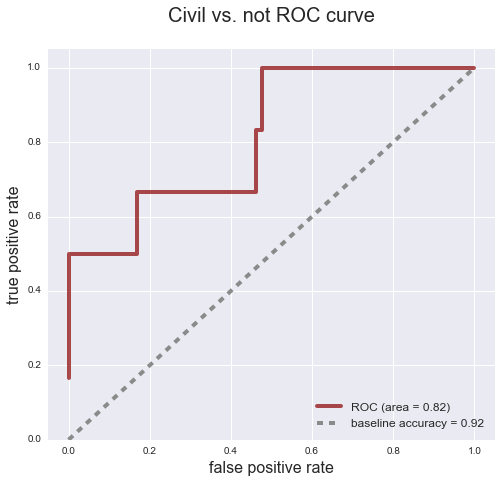

In [32]:
plot_roc(lm2, X_test2, y_test2, 'Civil') #ROC predicting the Civil War

## Precision Recall Curve

In [33]:
#Function for the Precision Recall Curve
from sklearn.metrics import (precision_recall_curve, average_precision_score, f1_score)

def plot_prauc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pp)
    avg_precision = average_precision_score(y, y_pp)
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(recall, precision, label='PRAUC (area = %0.2f)' % avg_precision,
             color='steelblue', linewidth=4,
             alpha=0.7)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('recall', fontsize=16)
    axr.set_ylabel('precision', fontsize=16)
    axr.set_title(varname+' vs. not PRAUC curve\n', fontsize=20)

    axr.legend(loc="upper right", fontsize=12)

    plt.show()

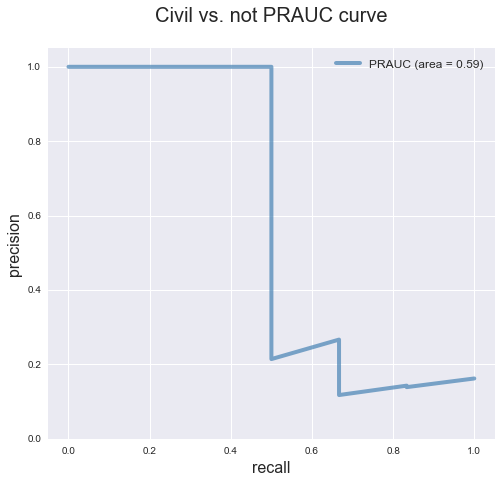

In [34]:
plot_prauc(lm2, X_test2, y_test2, 'Civil') #PR curve for predicting Civil War

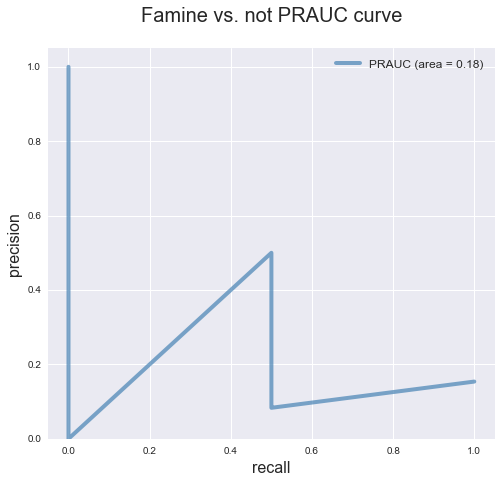

In [35]:
plot_prauc(lm, X_test, y_test, 'Famine') #The second PR curve predicting Famine

## PCA

In [36]:
#Using the linear model to accomplish a PCA model.

value = refugee_df.filter(regex = 'Ref|Rain|Pop|Fam|Fem|Male')
rem = refugee_df.filter(regex = '2015')
col = value.columns - rem.columns
X = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee_df['Refugees_2015'].values

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [37]:
from sklearn.decomposition import PCA

#Fitting a PCA model with 6 PCAs
pca = PCA(n_components=6)
pca.fit(X.values)

PCA(copy=True, n_components=6, whiten=False)

In [38]:
pcs = pca.transform(X)
pca_linreg = LinearRegression()
pca_scores = cross_val_score(pca_linreg, pcs[:,0:10], y, cv=5)
print np.mean(pca_scores)

0.418109496


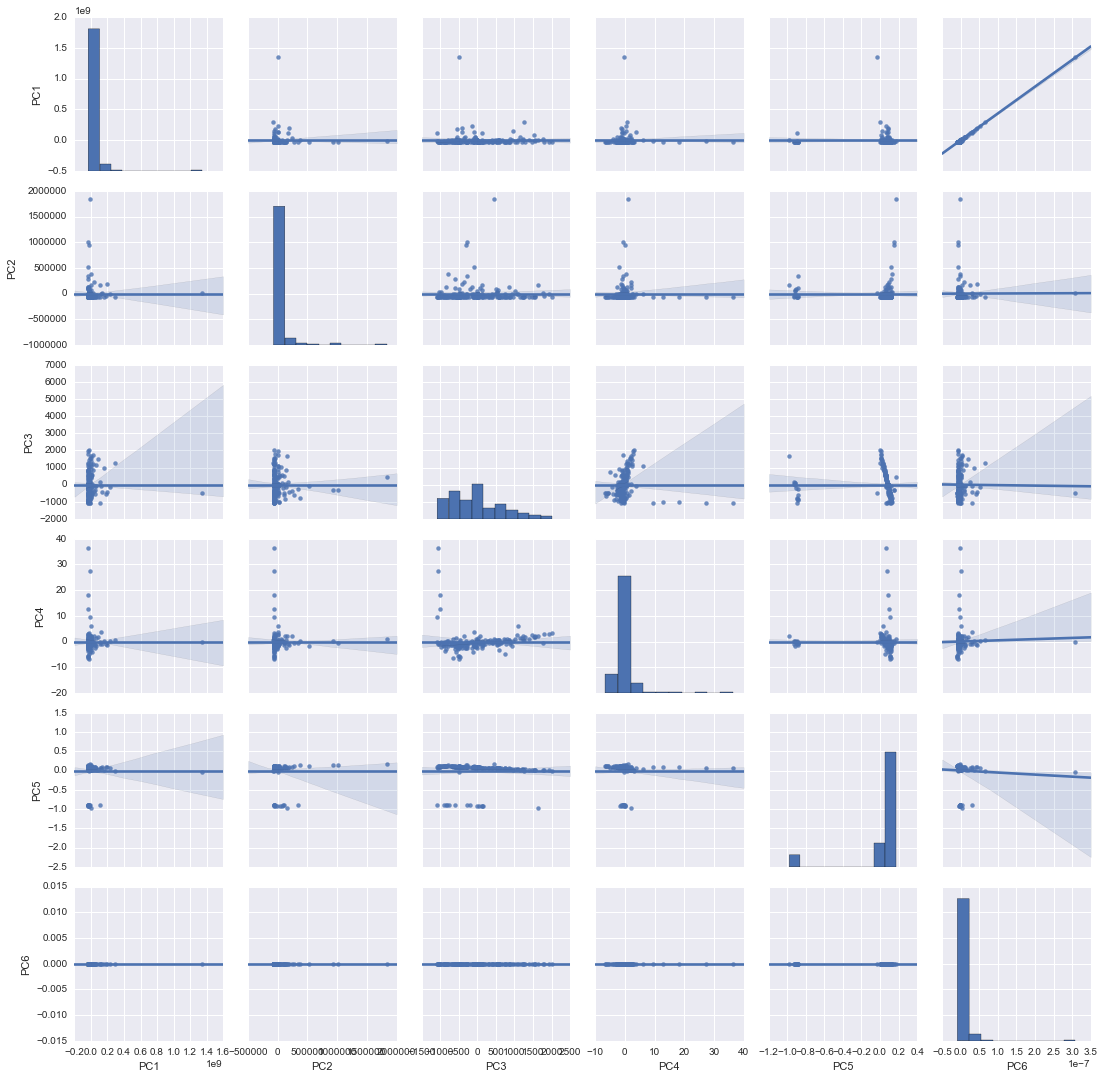

In [39]:
#Pairplot of the pcas
sns.pairplot(pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5', 'PC6']), kind='reg')

# Decision Tree

In [40]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty', u'Difference'],
      dtype='object')

In [41]:
#Using the second logistic regression predicting the Civil Wars in the past 15 years.

value = refugee_df.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee_df.filter(regex = 'Civ')
col = value.columns - rem.columns
X2 = refugee_df[col]
ss = StandardScaler()
Xn2 = ss.fit_transform(X2)
y2 = refugee_df['Civil'].values

X_train, X_test, y_train, y_test = train_test_split(Xn2, y2, test_size=0.3)

# Define your DecisionTreeClassifier
dctc = DecisionTreeClassifier(criterion='entropy')

# Search parameters
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt','auto', 2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

## Gridsearch    
dtc_gs = GridSearchCV(dctc, dtc_params, n_jobs=-1, cv=5, verbose=1)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [42]:
dtc_gs.fit(X_train, y_train)

# Print the best score

print "Best Score", dtc_gs.best_score_

Fitting 5 folds for each of 440 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed:    1.8s


Best Score 0.943089430894


[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed:    3.7s finished


In [43]:
dtc_best = dtc_gs.best_estimator_
fi = pd.DataFrame({
        'feature':X2.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
3,Poverty,0.493692
4,Refugees_2010,0.263251
2,Population,0.243057
0,Children_out_of_school,0.000000
1,Immigrants,0.000000
5,Refugees_2015,0.000000


# Description of results.

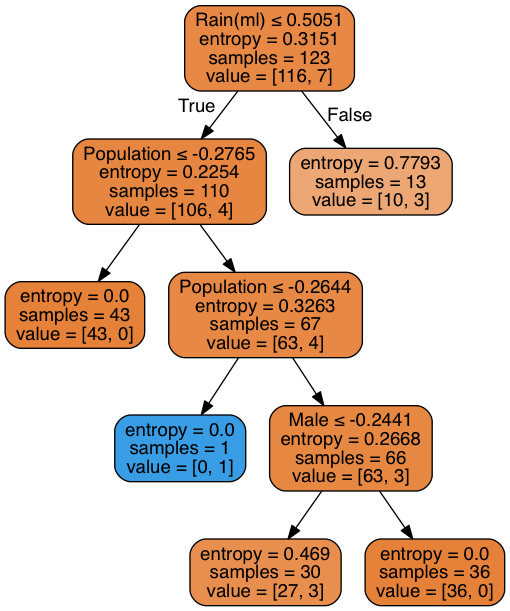

In [44]:
dot_data = StringIO()

# Define decision tree with best parameters, you can also use the best estimators
dctc_best = dtc_gs.best_estimator_

# Graph
export_graphviz(dctc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

#The Decision Tree contains the condition that is used to split the node
#If true go left, else right
#samples is the number of observations in that node before splitting
#entropy is information gain at each node.
#if it was randomly labeled according to the distribution of labels in the subset
#value is the count of each class at that node.

The map visualization below is created using folium, a python map visualization library. The package takes in a JSON file, which includes the country name, key, and coordinates for each country. By passing in the refugee data frame which contains the information regarding the Country, Key, and the number of refugees in 2010 and 2015 I was able to create a map visualization portraying the countries with the largest number of refugees. There are multiple options for setting the color scale for the gradient, I decided to look into 'YlOrRd' which colors the countries with the least number of refugees yellow, and the most number with red. This same visualization could be accomplished using Tableau which allows for interaction.

In [45]:
final = pd.read_csv('../Data/final_copy.csv')
final['Refugees_2015'].fillna(0, inplace = True)
final['Refugees_2010'].fillna(0, inplace = True)
final['Difference'] = final['Refugees_2015'] - final['Refugees_2010']

In [46]:
import folium
import pandas as pd

world_geo = r'/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/data.json'
map = folium.Map(location=[48, -102], zoom_start=1.7)
map.choropleth(geo_path=world_geo, data=final,
             columns=['Key', 'Refugees_2010'],
             threshold_scale=[0, 5000, 100000, 700000, 1000000, 3000000],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5,
             legend_name='Unemployment Rate (%)', reset = True)
map

In [47]:
import folium
import pandas as pd

world_geo = r'/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/data.json'
map = folium.Map(location=[48, -102], zoom_start=1.7)
map.choropleth(geo_path=world_geo, data=final,
             columns=['Key', 'Refugees_2015'],
             threshold_scale=[0, 5000, 100000, 700000, 1000000, 3000000],
             key_on='feature.id', 
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5,
             legend_name='Unemployment Rate (%)', reset = True)
map

In [48]:
import folium
import pandas as pd

world_geo = r'/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/data.json'
map = folium.Map(location=[48, -102], zoom_start=1.7)
map.choropleth(geo_path=world_geo, data=final,
             columns=['Key', 'Difference'],
             threshold_scale=[-1000000, 5, 100000, 700000, 1000000, 3000000],
             key_on='feature.id', 
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5,
             legend_name='Unemployment Rate (%)', reset = True)
map

By looking into the folium visualization for the differences in refugees we can see that Turkey had the highest increase in their refugees from 2010. Some countries including Canada and Syria have decreased the number of accepted refugees due to recent conflicts and political protest.

# Conclusion.

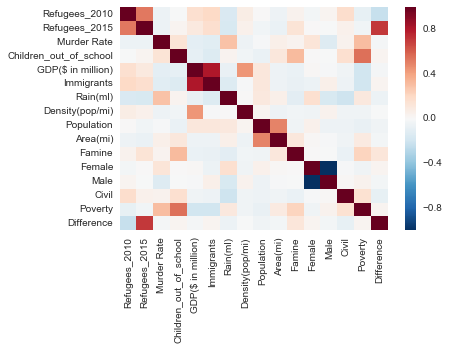

In [49]:
heat = sns.heatmap(refugee_df.corr())
heat

In [50]:
fig = heat.get_figure()
fig.savefig("HeatMap.png")

The linear regression R2 shows there is a moderate amount of variance between the predictor variables and the baseline model. I initially tried all variations, but realized by dropping Civil War, Children out of School, and Difference the R2 improved from 0.34 to 0.42. I tried improving the R2 by using regularization methods including RidgeCV, LassoCV, and ElasticNetCV. However; these methods didn't improve the models and ended up having a worse score. We could conclude the number of refugees in 2010, Rain fall in ml, Population of the countries, recent famines, and the Female and Male population are helpful in predicting the number of Refugees in 2015, while the rest of the variables weren't as helpful.

Looking at the logistic regression R2 value for the Civil War, and Famine target variables we can say there is a high variance between the predictor variables and the baseline model. The predictor variables in the model were extremely helpful in predicting the number of Refugees in 2015.

Based on the country's profile we can say there is an impact on the number of refugees who will find asylum in the country. If there a high number of refugees in 2010, GDP, and number of immigrants there is a higher chance of refugees in 2015. If there is a high number of Rainfall, and Murder Rate there is a chance of a descent between 2010 and 2015. By reducing racism, and providing a safer environment in other countries, there is a chance more refugees would seek to find asylum.